---
title: Visualizing SPI distance as compared to NCBI taxonomic category

author: Benjamin Doran

---

In [1]:
using DrWatson
@quickactivate "Doran_etal_2022"

In [98]:
using Muon
using LinearAlgebra
using Distances
using Statistics
using StatsPlots
using StatsBase
using Random: shuffle
using SPI
theme(:default, grid=false, label="")

In [3]:
UP7047_NCOLS = 10117

10117

## Setup

In [4]:
biobank = readh5mu(joinpath(datadir(), "exp_pro", "BB669", "BB669.h5mu"))

┌ Warning: Cannot join columns with the same name because var_names are intersecting.
└ @ Muon /Users/ben/.julia/packages/Muon/eLqpV/src/mudata.jl:351


MuData object 669 ✕ 21473
└ metabolites_foldchange
  AnnData object 669 ✕ 38
└ metabolites_millimolar
  AnnData object 669 ✕ 10
└ UPorder_oggs
  AnnData object 669 ✕ 10177
└ oggs
  AnnData object 669 ✕ 11248

In [5]:
pdir = plotsdir("BB669distanceplots_taxonomy") |> mkpath

"/Users/ben/projects/Doran_etal_2022/plots/BB669distanceplots_taxonomy"

In [8]:
keys(biobank["UPorder_oggs"].obsp)

KeySet for a Muon.AlignedMapping{Tuple{1 => 1, 2 => 1}, String, AnnData} with 1 entry. Keys:
  "SDij"

In [9]:
SPImtx = biobank["UPorder_oggs"].obsp["SDij"][:, :];

In [14]:
BBusv = svd(biobank["oggs"].X[:, :])
BBSPImtx = calc_spi_mtx(BBusv.U, BBusv.S, getintervals(BBusv.S)) ./ size(BBusv.V,1);

In [15]:
taxaranklabels = string.([:phylum :class :order :family :genus :species])
taxarankcolors = [:grey :red :pink :orange :lightblue :green :aqua]|> reverse;

In [16]:
uppertriangle = triu(trues(size(SPImtx)), 1);

## Specific heatmap of uniformis & gnavus metabolite profiles

In [13]:
r_idxs = occursin.("gnavus", biobank.obs.species) |> findall
popat!(r_idxs, occursin.("MSK.8.22", biobank.obs_names[r_idxs]) |> findfirst) # outlier sample
b_idxs = occursin.("uniformis", biobank.obs.species) |> findall;
# popat!(b_vulgatus_idxs, occursin.("MSK.7.24", biobank.obs_names[b_vulgatus_idxs]) |> findfirst) # contaminated sample
donorid = biobank.obs_names |>
    v -> split.(v, ".") |>
    v -> getindex.(v, 2) |>
    v -> parse.(Int,v)

b_idxs = b_idxs[sortperm(donorid[b_idxs])]
r_idxs = r_idxs[sortperm(donorid[r_idxs])]

br_idxs = union(b_idxs,  r_idxs);

In [14]:
bb673mm_buniformis = biobank["metabolites_millimolar"].layers["raw"][:,[4,1,2,3]][b_idxs, :];


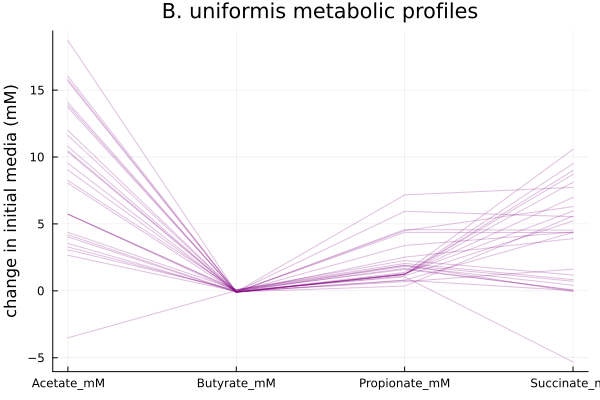

In [15]:
plot(bb673mm_buniformis', 
    title="B. uniformis metabolic profiles",
    ylabel="change in initial media (mM)",
    c=:purple, 
    label="", 
    alpha=.25,
    xticks=(1:4,biobank["metabolites_millimolar"].var_names[[4,1,2,3]]),
)

In [16]:
bb673mm_rgnavus = biobank["metabolites_millimolar"].layers["raw"][:,[4,1,2,3]][r_idxs, :];

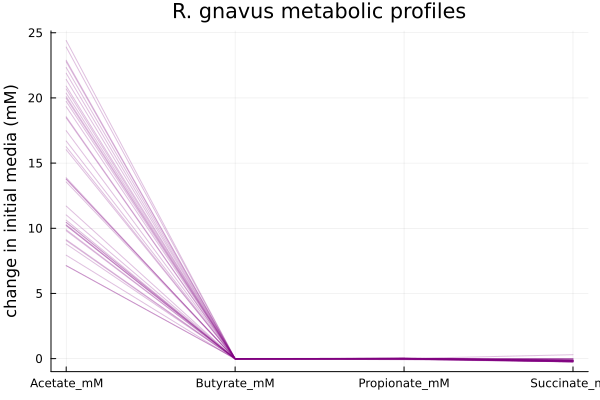

In [17]:
plot(bb673mm_rgnavus', 
    title="R. gnavus metabolic profiles",
    ylabel="change in initial media (mM)",
    c=:purple, 
    label="", 
    alpha=.25,
    xticks=(1:4,biobank["metabolites_millimolar"].var_names[[4,1,2,3]]),
)

In [18]:
rownames = biobank.obs_names[br_idxs[[14, 23, 40, 49]]]

4-element Vector{String}:
 "MSK.18.77_Bacteroides_uniformis"
 "MSK.19.4_Bacteroides_uniformis"
 "MSK.15.54_Ruminococcus_gnavus"
 "MSK.22.24_Ruminococcus_gnavus"

In [19]:
colnames=biobank["metabolites_millimolar"].var_names[[4,1,2,3]]

4-element Vector{String}:
 "Acetate_mM"
 "Butyrate_mM"
 "Propionate_mM"
 "Succinate_mM"

In [20]:
pltmtx = vcat(bb673mm_buniformis, bb673mm_rgnavus)[[14, 23, 40, 49], :]

4×4 Matrix{Float64}:
 15.665  -0.1     4.5      6.295
 16.035  -0.09    4.575    4.53
 19.735  -0.02   -0.0425  -0.2425
 17.485  -0.005   0.0175  -0.1475

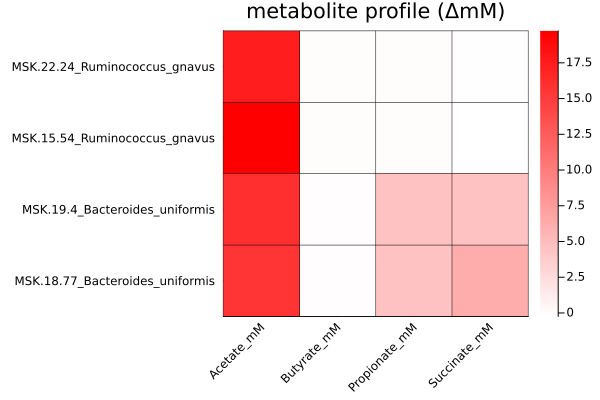

In [25]:
plot(
    title="metabolite profile (ΔmM)",
    yticks=(1:4, rownames), 
    xticks=(1:4, colnames),
    xrotation=45,
    bottommargin=5Plots.Measures.mm,
    )
heatmap!(pltmtx, c=[:white, :red])
hline!(collect(1:4) .+ .5, c=:black, lw=.5, label="")
vline!(collect(1:4) .+ .5, c=:black, lw=.5, label="")

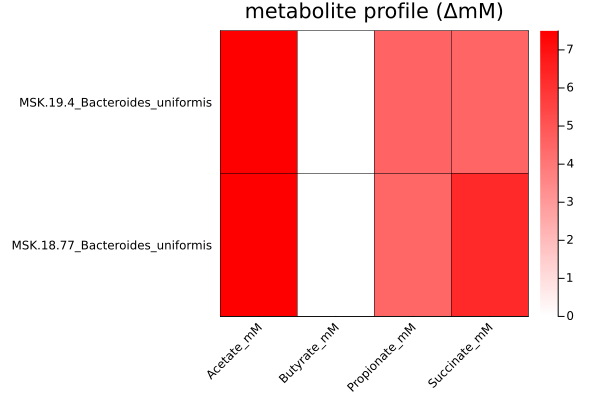

In [22]:
plot(
    title="metabolite profile (ΔmM)",
    yticks=(1:4, rownames[1:2]), 
    xticks=(1:4, colnames),
    xrotation=45,
    bottommargin=5Plots.Measures.mm,
    framestyle=:box,
    )
heatmap!(pltmtx[1:2, :], c=[:white, :red], clims=(0, 7.5))
hline!([1.5], c=:black, lw=.5, label="")
vline!([1.5, 2.5, 3.5], c=:black, lw=.5, label="")

In [ ]:
savefig(joinpath(pdir, "metprofile_2strains_uniformis-uniformis.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/BB673distanceplots/metprofile_2strains_uniformis-uniformis.pdf"

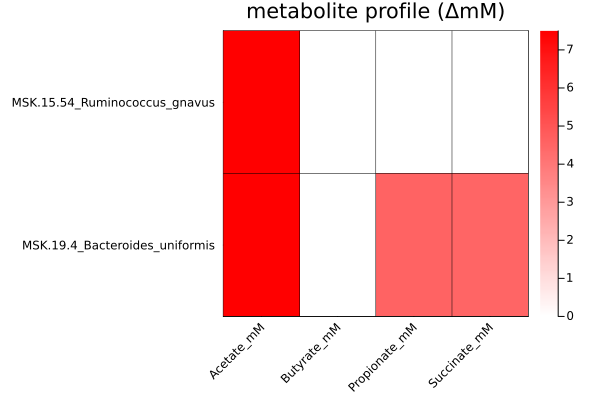

In [ ]:
plot(
    title="metabolite profile (ΔmM)",
    yticks=(1:4, rownames[2:3]), 
    xticks=(1:4, colnames),
    xrotation=45,
    bottommargin=5Plots.Measures.mm,
    framestyle=:box,
    )
heatmap!(pltmtx[2:3, :], c=[:white, :red], clims=(0., 7.5))
hline!([1.5], c=:black, lw=.5, label="")
vline!([1.5, 2.5, 3.5], c=:black, lw=.5, label="")

In [ ]:
savefig(joinpath(pdir, "metprofile_2strains_gnavus-uniformis.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/BB673distanceplots/metprofile_2strains_gnavus-uniformis.pdf"

## Adams plot - metabolite profiles

In [ ]:
bmask = biobank.obs.phylum .== "Bacteroidetes"
fmask = biobank.obs.phylum .== "Firmicutes";

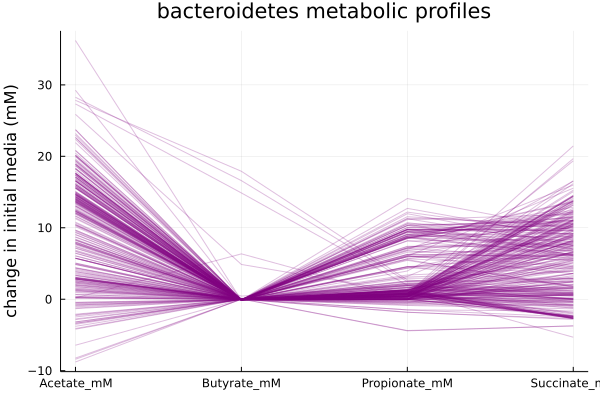

In [ ]:
bb673mm = biobank["metabolites_millimolar"].layers["raw"][:,[4,1,2,3]][bmask, :];
plot(bb673mm', 
    title="bacteroidetes metabolic profiles",
    ylabel="change in initial media (mM)",
    c=:purple, 
    label="", 
    alpha=.25,
    xticks=(1:4,biobank["metabolites_millimolar"].var_names[[4,1,2,3]]),
)

In [ ]:
savefig(joinpath(pdir, "bacteroidetes_metabolicprofiles_raw-deltamM.pdf"))

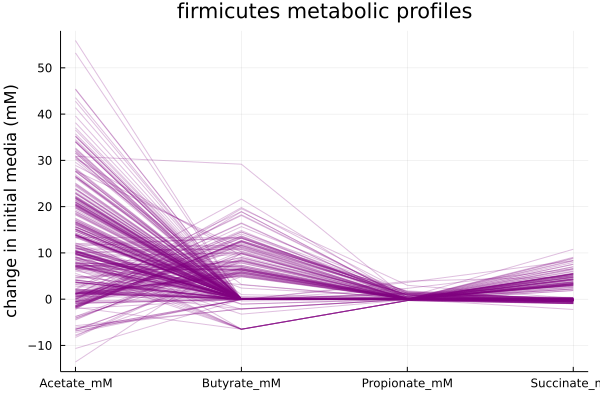

In [ ]:
bb673mm = biobank["metabolites_millimolar"].layers["raw"][:,[4,1,2,3]][fmask, :];
plot(bb673mm', 
    title="firmicutes metabolic profiles",
    ylabel="change in initial media (mM)",
    c=:purple, 
    label="", 
    alpha=.25,
    xticks=(1:4,biobank["metabolites_millimolar"].var_names[[4,1,2,3]]),
)

In [ ]:
savefig(joinpath(pdir, "firmicutes_metabolicprofiles_raw-deltamM.pdf"))

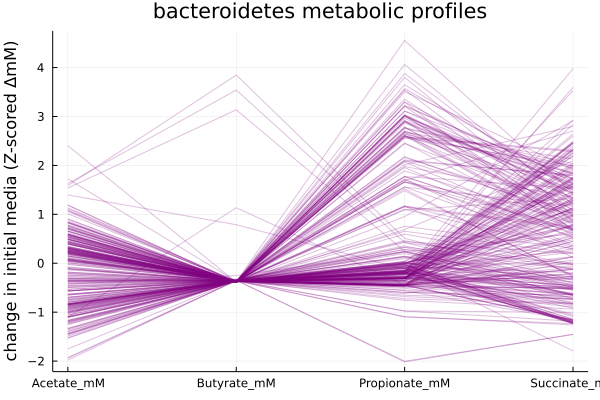

In [ ]:
bb673mm = biobank["metabolites_millimolar"].X[:,[4,1,2,3]][bmask, :];
plot(bb673mm', 
    title="bacteroidetes metabolic profiles",
    ylabel="change in initial media (Z-scored ΔmM)",
    c=:purple, 
    label="", 
    alpha=.25,
    xticks=(1:4,biobank["metabolites_millimolar"].var_names[[4,1,2,3]]),
)

In [ ]:
savefig(joinpath(pdir, "bacteroidetes_metabolicprofiles.pdf"))

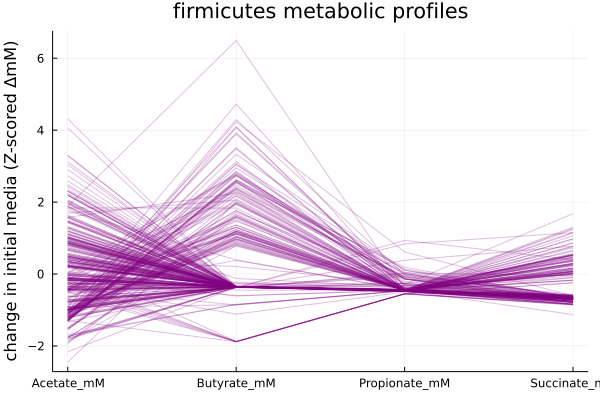

In [ ]:
bb673mm = biobank["metabolites_millimolar"].X[:,[4,1,2,3]][fmask, :];
plot(bb673mm', 
    title="firmicutes metabolic profiles",
    ylabel="change in initial media (Z-scored ΔmM)",
    c=:purple, 
    label="", 
    alpha=.25,
    xticks=(1:4,biobank["metabolites_millimolar"].var_names[[4,1,2,3]]),
)

In [ ]:
savefig(joinpath(pdir, "firmicutes_metabolicprofiles.pdf"))

## conflated pairs violin plots

In [105]:
# bbtaxa = biobank.obs[:,[:phylum_gtdb, :class_gtdb, :order_gtdb, :family_gtdb, :genus_gtdb, :species_gtdb]];
bbtaxa = biobank.obs[:,[:phylum_ncbi, :class_ncbi, :order_ncbi, :family_ncbi, :genus_ncbi, :species_ncbi]];

In [106]:
# 4 Main metabolites  ["Acetate_mM", "Butyrate_mM", "Propionate_mM", "Succinate_mM"]
# metabolitedistance = Distances.pairwise(Euclidean(), biobank["metabolites_millimolar"].X[:, 1:4]');
# metabolitedistancerel = Distances.pairwise(Euclidean(), biobank["metabolites_foldchange"].X[:, :]');
# metabolitedistance_mM = Distances.pairwise(Euclidean(), biobank["metabolites_millimolar"].X[:, :]');

taxanomicdistance = pairwise(eachrow(Matrix(bbtaxa)[:,6:-1:1])) do a, b
    x = findfirst(a .== replace(b, "<unclassified>"=>"missing"))
    x === nothing ? 6 : x-1
end;

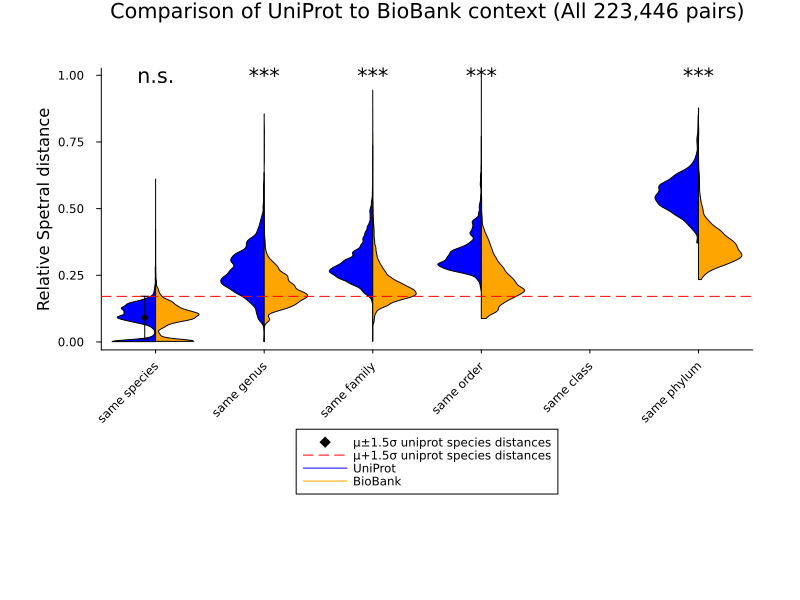

In [107]:
n = 6
labels = ["same species", "same genus", "same family", "same order", "same class", "same phylum", "same kingdom"];
plot(size=(800,600), 
    title="Comparison of UniProt to BioBank context (All 223,446 pairs)", 
    ylabel="Relative Spetral distance", 
    tickdirection=:out,
    # format=:png, dpi=200,
    margin=10Plots.Measures.mm,
    xticks=(1:n, labels[1:n]),
    xlims=(.5, n +.5),
    xrotation=45,
    legend=:outerbottom,
    grid=false,
)
xdata = taxanomicdistance[uppertriangle]
ydata1 = (SPImtx ./ maximum(SPImtx))[uppertriangle]
ydata2 = (BBSPImtx ./ maximum(BBSPImtx))[uppertriangle]
for i in 0:n
    mask = xdata .== i
    violin!(xdata[mask].+1, ydata1[mask],
        label="",
        c=:blue, 
        side=:left,
        trim=true,
        )
    violin!(xdata[mask].+1, ydata2[mask],
        label="",
        c=:orange, 
        side=:right,
        trim=true
        )
end
allspeciesdists = ydata1[xdata.==0]
allspeciesdists2 = ydata2[xdata.==0]
scatter!([.9], [mean(allspeciesdists)], yerror=1.5std(allspeciesdists), c=:black, label="μ±1.5σ uniprot species distances", shape=:diamond)
# scatter!([1.1], [mean(allspeciesdists2)], yerror=1.5std(allspeciesdists2), c=:black,  shape=:diamond)
# hline!([mean(allspeciesdists)+std(allspeciesdists)], c=:red, linestyle=:dash)
hline!([mean(allspeciesdists)+1.5std(allspeciesdists)], c=:red, label="μ+1.5σ uniprot species distances", linestyle=:dash)
# hline!([mean(allspeciesdists2)+1.5std(allspeciesdists2)], c=:orange, linestyle=:dash)
plot!([0 0], c=[:blue :orange], label=["UniProt" "BioBank"])
annotate!(1:6, ones(6), ["n.s.", "***", "***", "***", "", "***"], fontsize=5)
plot!()

In [51]:
savefig(joinpath(pdir, "SPIdistUPvsSPIdistBB_splitbyNCBItaxonomy_groupedviolin.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/BB669distanceplots_taxonomy/SPIdistUPvsSPIdistBB_splitbyNCBItaxonomy_groupedviolin.pdf"

## KS and wilcoxon test of each distribution

In [52]:
using HypothesisTests

In [53]:
xdata = taxanomicdistance[uppertriangle]
ydata1 = (SPImtx ./ maximum(SPImtx))[uppertriangle]
ydata2 = (BBSPImtx ./ maximum(BBSPImtx))[uppertriangle]
for i in 0:n
    mask = xdata .== i
    pval = pvalue(ApproximateTwoSampleKSTest(ydata1[mask], ydata2[mask]))
    @show (i, pval * 7)
end

(i, pval * 7) = (0, 1.4737693215045304e-24)
(i, pval * 7) = (1, 0.0)
(i, pval * 7) = (2, 0.0)
(i, pval * 7) = (3, 0.0)
(i, pval * 7) = (4, NaN)
(i, pval * 7) = (5, 0.0)


(i, pval * 7) = (6, 0.0)


In [54]:
xdata = taxanomicdistance[uppertriangle]
ydata1 = (SPImtx ./ maximum(SPImtx))[uppertriangle]
ydata2 = (BBSPImtx ./ maximum(BBSPImtx))[uppertriangle]
for i in [0, 1, 2, 3, 5, 6]
    mask = xdata .== i
    pval = pvalue(MannWhitneyUTest(ydata1[mask], ydata2[mask]); tail=:right)
    @show (i, pval * 7)
end

(i, pval * 7) = (0, 0.43019467825203483)
(i, pval * 7) = (1, 0.0)
(i, pval * 7) = (2, 0.0)
(i, pval * 7) = (3, 0.0)


(i, pval * 7) = (5, 0.0)
(i, pval * 7) = (6, 0.0)


## conflated pairs violin plots (GTDB)

In [55]:
# bbtaxa = biobank.obs[:,[:phylum_ncbi, :class_ncbi, :order_ncbi, :family_ncbi, :genus_ncbi, :species_ncbi]];
bbtaxa = biobank.obs[:,[:phylum_gtdb, :class_gtdb, :order_gtdb, :family_gtdb, :genus_gtdb, :species_gtdb]];

In [56]:
# 4 Main metabolites  ["Acetate_mM", "Butyrate_mM", "Propionate_mM", "Succinate_mM"]
# metabolitedistance = Distances.pairwise(Euclidean(), biobank["metabolites_millimolar"].X[:, 1:4]');
# metabolitedistancerel = Distances.pairwise(Euclidean(), biobank["metabolites_foldchange"].X[:, :]');
# metabolitedistance_mM = Distances.pairwise(Euclidean(), biobank["metabolites_millimolar"].X[:, :]');

taxanomicdistance = pairwise(eachrow(Matrix(bbtaxa)[:,6:-1:1])) do a, b
    x = findfirst(a .== replace(b, "<unclassified>"=>"missing"))
    x === nothing ? 6 : x-1
end;

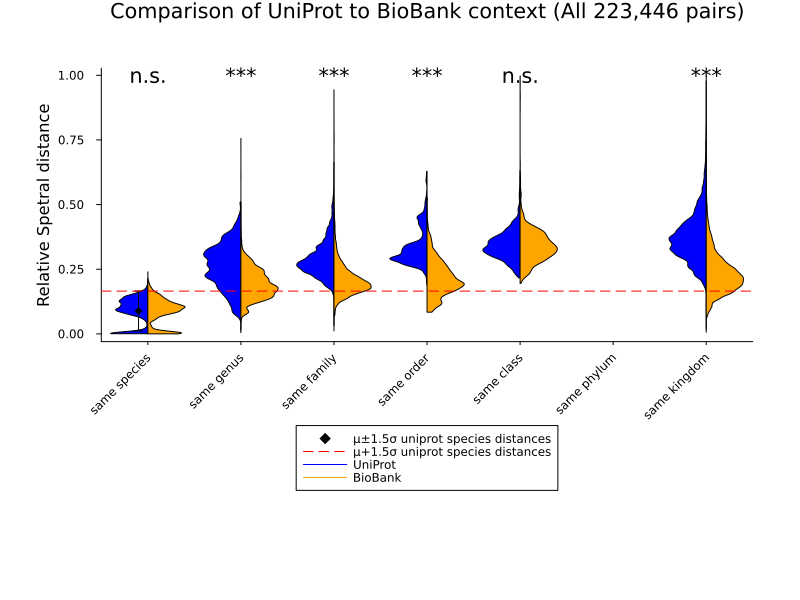

In [63]:
n = 7
labels = ["same species", "same genus", "same family", "same order", "same class", "same phylum", "same kingdom"];
plot(size=(800,600), 
    title="Comparison of UniProt to BioBank context (All 223,446 pairs)", 
    ylabel="Relative Spetral distance", 
    tickdirection=:out,
    # format=:png, dpi=200,
    margin=10Plots.Measures.mm,
    xticks=(1:n, labels[1:n]),
    xlims=(.5, n +.5),
    xrotation=45,
    legend=:outerbottom,
    grid=false,
)
xdata = taxanomicdistance[uppertriangle]
ydata1 = (SPImtx ./ maximum(SPImtx))[uppertriangle]
ydata2 = (BBSPImtx ./ maximum(BBSPImtx))[uppertriangle]
for i in 0:n
    mask = xdata .== i
    violin!(xdata[mask].+1, ydata1[mask],
        label="",
        c=:blue, 
        side=:left,
        trim=true,
        )
    violin!(xdata[mask].+1, ydata2[mask],
        label="",
        c=:orange, 
        side=:right,
        trim=true
        )
end
allspeciesdists = ydata1[xdata.==0]
allspeciesdists2 = ydata2[xdata.==0]
scatter!([.9], [mean(allspeciesdists)], yerror=1.5std(allspeciesdists), c=:black, label="μ±1.5σ uniprot species distances", shape=:diamond)
# scatter!([1.1], [mean(allspeciesdists2)], yerror=1.5std(allspeciesdists2), c=:black,  shape=:diamond)
# hline!([mean(allspeciesdists)+std(allspeciesdists)], c=:red, linestyle=:dash)
hline!([mean(allspeciesdists)+1.5std(allspeciesdists)], c=:red, label="μ+1.5σ uniprot species distances", linestyle=:dash)
# hline!([mean(allspeciesdists2)+1.5std(allspeciesdists2)], c=:orange, linestyle=:dash)
plot!([0 0], c=[:blue :orange], label=["UniProt" "BioBank"])
annotate!(1:7, ones(6), ["n.s.", "***", "***", "***", "n.s.", "", "***"], fontsize=5)
plot!()

In [64]:
savefig(joinpath(pdir, "SPIdistUPvsSPIdistBB_splitbyGTDBtaxonomy_groupedviolin.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/BB669distanceplots_taxonomy/SPIdistUPvsSPIdistBB_splitbyGTDBtaxonomy_groupedviolin.pdf"

## KS and wilcoxon test of each distribution

In [65]:
using HypothesisTests

In [66]:
xdata = taxanomicdistance[uppertriangle]
ydata1 = (SPImtx ./ maximum(SPImtx))[uppertriangle]
ydata2 = (BBSPImtx ./ maximum(BBSPImtx))[uppertriangle]
for i in 0:n
    mask = xdata .== i
    pval = pvalue(ApproximateTwoSampleKSTest(ydata1[mask], ydata2[mask]))
    @show (i, pval * 7)
end

(i, pval * 7) = (0, 4.701623595193567e-26)
(i, pval * 7) = (1, 0.0)
(i, pval * 7) = (2, 0.0)
(i, pval * 7) = (3, 0.0)
(i, pval * 7) = (4, 0.07709846220847276)
(i, pval * 7) = (5, NaN)
(i, pval * 7) = (6, 0.0)
(i, pval * 7) = (7, NaN)


In [68]:
xdata = taxanomicdistance[uppertriangle]
ydata1 = (SPImtx ./ maximum(SPImtx))[uppertriangle]
ydata2 = (BBSPImtx ./ maximum(BBSPImtx))[uppertriangle]
for i in [0, 1, 2, 3, 4, 6]
    mask = xdata .== i
    pval = pvalue(MannWhitneyUTest(ydata1[mask], ydata2[mask]); tail=:right)
    @show (i, pval * 7)
end

(i, pval * 7) = (0, 0.08722134167891941)
(i, pval * 7) = (1, 0.0)
(i, pval * 7) = (2, 0.0)
(i, pval * 7) = (3, 0.0)
(i, pval * 7) = (4, 0.7915385027024147)
(i, pval * 7) = (6, 0.0)


## Conflated pairs

In [108]:
issameorder = taxanomicdistance .== 3

669×669 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  1  1  0  1  1  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  1  1  0  1  1  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  1  1  0  1  1  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  1  1  0  1  1  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  1  1  0  1  1  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  1  1  0  1  1  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  1  1  0  1  1  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  1  1  0  1  1  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  1  1  0  1  1  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  1  1  0  1  1  0  0  1  1
 ⋮              ⋮              ⋮        ⋱           ⋮              ⋮        
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  0  0  1  0  0  1  0  1  1  1  0  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  

In [109]:
speciesthreshold = mean(allspeciesdists)+1.5std(allspeciesdists)

0.17103652327378055

In [110]:
BBUPisbelowthreshold = SPImtx .< speciesthreshold;
any(issameorder .& BBUPisbelowthreshold)

false

In [111]:
BBisbelowthreshold = BBSPImtx .< speciesthreshold
any(issameorder .& BBisbelowthreshold)

true

In [132]:
incorrecttaxa = union(getindex.(findall(issameorder .& BBisbelowthreshold), 1), getindex.(findall(issameorder .& BBisbelowthreshold), 2))
orderedincorrecttaxa = incorrecttaxa[sortperm(bbtaxa[incorrecttaxa, :].family_ncbi)]

258-element Vector{Int64}:
   1
   4
   5
   6
   8
  14
 134
 135
 136
 137
   ⋮
 398
 399
 401
 402
 403
 404
 425
 427
 429

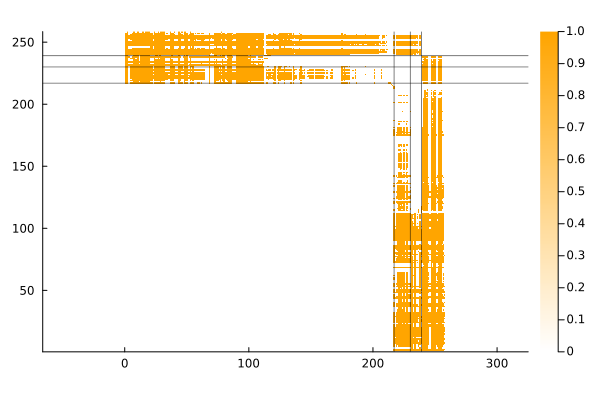

In [149]:
pltmtx = float.((issameorder .& BBisbelowthreshold)[orderedincorrecttaxa, orderedincorrecttaxa])
pltmtx[pltmtx .== 0] .= NaN
heatmap(pltmtx, c=[:white, :orange], ratio=1)
vline!([217, 230, 239], c=:black, lw=.5)
hline!([217, 230, 239], c=:black, lw=.5)

In [150]:
savefig(joinpath(pdir, "incorrecttaxa_heatmap.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/BB669distanceplots_taxonomy/incorrecttaxa_heatmap.pdf"

In [114]:
bbtaxa[incorrecttaxa, :]

258×6 DataFrame
 Row │ phylum_ncbi    class_ncbi   order_ncbi     family_ncbi      genus_ncbi  ⋯
     │ String         String       String         String           String      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae    Alistipes   ⋯
   2 │ Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae    Alistipes
   3 │ Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae    Alistipes
   4 │ Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae    Alistipes
   5 │ Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae    Alistipes   ⋯
   6 │ Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae    Alistipes
   7 │ Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae    Alistipes
   8 │ Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae    Alistipes
  ⋮  │       ⋮             ⋮             ⋮               ⋮                ⋮    ⋱
 252 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   Phocaeicola ⋯
 253 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   Bacteroides
 254 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   Phocaeicola
 255 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   Bacteroides
 256 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   Phocaeicola ⋯
 257 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   Phocaeicola
 258 │ Firmicutes     Clostridia   Eubacteriales  Lachnospiraceae  Coprococcus
                                                  2 columns and 243 rows omitted

In [130]:
sort(countmap(bbtaxa[incorrecttaxa, :].family_ncbi), byvalue=false, rev=false)

OrderedCollections.OrderedDict{String, Int64} with 6 entries:
  "Bacteroidaceae"   => 214
  "Lachnospiraceae"  => 1
  "Oscillospiraceae" => 1
  "Prevotellaceae"   => 14
  "Rikenellaceae"    => 9
  "Tannerellaceae"   => 19

In [140]:
214 + 14

228

In [ ]:
sort(bbtaxa[incorrecttaxa, :].family_ncbi

In [131]:
orderedincorrecttaxa = incorrecttaxa[sortperm(bbtaxa[incorrecttaxa, :].family_ncbi)]

258-element Vector{Int64}:
   1
   4
   5
   6
   8
  14
 134
 135
 136
 137
   ⋮
 398
 399
 401
 402
 403
 404
 425
 427
 429

In [128]:
biobank.obs.donor_id |> unique

27-element Vector{String}:
 "FC0016"
 "FC0010"
 "FC0013"
 "FC0018"
 "FC0014"
 "FC0009"
 "FC0015"
 "FC0006"
 "FC0017"
 "FC0019"
 ⋮
 "DFI0001"
 "DFI0004"
 "FC0007"
 "FC0002"
 "DFI0005"
 "DFI0003"
 "DFI0006"
 "DFI0002"
 "FC0008"